In [21]:
from nba_api.stats.endpoints.leaguegamelog import LeagueGameLog
import time
import tqdm
import pandas as pd

In [9]:
game_log = LeagueGameLog(season='2019-20', player_or_team_abbreviation='P', date_from_nullable='2019-12-25', date_to_nullable='2019-12-25')

In [10]:
game_log_df = game_log.get_data_frames()[0]

In [12]:
game_log_df.sort_values(by='PTS', ascending=False)

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
56,22019,202695,Kawhi Leonard,1610612746,LAC,LA Clippers,0021900458,2019-12-25,LAC @ LAL,W,38,11,19,0.579,5,7,0.714,8,8,1.000,3,9,12,5,1,0,3,4,35,13,1
2,22019,203954,Joel Embiid,1610612755,PHI,Philadelphia 76ers,0021900456,2019-12-25,PHI vs. MIL,W,28,11,21,0.524,3,6,0.500,6,6,1.000,2,9,11,3,0,2,1,5,31,15,1
78,22019,1627742,Brandon Ingram,1610612740,NOP,New Orleans Pelicans,0021900459,2019-12-25,NOP @ DEN,W,36,11,18,0.611,7,9,0.778,2,2,1.000,1,6,7,2,2,1,2,0,31,11,1
15,22019,203114,Khris Middleton,1610612749,MIL,Milwaukee Bucks,0021900456,2019-12-25,MIL @ PHI,L,33,12,21,0.571,5,9,0.556,2,2,1.000,3,5,8,4,1,0,1,3,31,-7,1
20,22019,201566,Russell Westbrook,1610612745,HOU,Houston Rockets,0021900457,2019-12-25,HOU @ GSW,L,40,11,32,0.344,0,8,0.000,8,8,1.000,4,8,12,5,0,0,4,5,30,-9,1
97,22019,1627759,Jaylen Brown,1610612738,BOS,Boston Celtics,0021900455,2019-12-25,BOS @ TOR,W,35,10,13,0.769,5,7,0.714,5,6,0.833,0,6,6,4,0,0,3,1,30,6,1
87,22019,1627832,Fred VanVleet,1610612761,TOR,Toronto Raptors,0021900455,2019-12-25,TOR vs. BOS,L,37,11,21,0.524,2,5,0.400,3,3,1.000,0,4,4,6,4,0,4,1,27,-17,1
46,22019,1628398,Kyle Kuzma,1610612747,LAL,Los Angeles Lakers,0021900458,2019-12-25,LAL vs. LAC,L,27,8,17,0.471,4,9,0.444,5,6,0.833,1,3,4,0,1,0,0,1,25,10,1
32,22019,201935,James Harden,1610612745,HOU,Houston Rockets,0021900457,2019-12-25,HOU @ GSW,L,38,9,18,0.500,6,10,0.600,0,1,0.000,1,5,6,11,3,0,2,3,24,-18,1
40,22019,203076,Anthony Davis,1610612747,LAL,Los Angeles Lakers,0021900458,2019-12-25,LAL vs. LAC,L,39,8,17,0.471,1,6,0.167,7,8,0.875,1,5,6,3,2,2,3,4,24,-10,1


In [13]:
# write a function for each season, then groupby player points/minutes

In [14]:
seasons = [f"{item}-{str(item+1)[-2:]}" for item in range(1946, 2020)]

In [19]:
all_data = []
for season in tqdm.tqdm(seasons):
    start_year = season.split('-')[0]
    game_log = LeagueGameLog(season=season, player_or_team_abbreviation='P', date_from_nullable=f'{start_year}-12-25', date_to_nullable=f'{start_year}-12-25')
    df = game_log.get_data_frames()[0]
    all_data.append(df)
    time.sleep(0.4)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [01:04<00:00,  1.14it/s]


In [22]:
full_df = pd.concat(all_data)

In [25]:
total_christmas_points = full_df.groupby('PLAYER_NAME').PTS.sum()

In [31]:
full_df = full_df.fillna(0.0)

In [34]:
total_games = full_df.PLAYER_NAME.value_counts()

In [32]:
full_df.groupby('PLAYER_NAME').sum()

,PLAYER_ID,TEAM_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,,,
A.C. Green,5520,9663676509,193,27,51.0,3.149,1.0,3.0,0.500,11,16.0,2.292,18.0,37.0,55.0,7.0,5.0,2.0,2.0,13.0,66,-9.0,0
Aaron Brooks,603498,4831838227,52,10,22.0,1.362,5.0,7.0,2.167,0,0.0,0.000,1.0,6.0,7.0,7.0,0.0,1.0,3.0,6.0,25,18.0,3
Aaron James,154230,3221225524,22,6,11.0,1.100,0.0,0.0,0.000,0,3.0,0.000,0.0,0.0,7.0,3.0,2.0,0.0,0.0,7.0,12,0.0,0
Aaron McKie,243,1610612755,29,4,13.0,0.308,0.0,1.0,0.000,0,0.0,0.000,0.0,4.0,4.0,0.0,1.0,0.0,2.0,2.0,8,-1.0,0
Aaron Williams,1425,1610612751,17,4,4.0,1.000,0.0,0.0,0.000,1,1.0,1.000,0.0,3.0,3.0,1.0,0.0,0.0,1.0,4.0,9,6.0,0
Abdel Nader,1627846,1610612760,10,0,3.0,0.000,0.0,2.0,0.000,0,0.0,0.000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,2.0,1
Abdul Jeelani,77126,1610612757,12,2,2.0,1.000,0.0,0.0,0.000,3,4.0,0.750,1.0,2.0,3.0,2.0,0.0,0.0,0.0,2.0,7,0.0,0
Acie Law,201151,1610612744,5,0,0.0,0.000,0.0,0.0,0.000,0,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,-9.0,0
Adam Keefe,228,1610612762,23,3,3.0,1.000,0.0,0.0,0.000,5,6.0,0.833,1.0,3.0,4.0,0.0,0.0,0.0,0.0,5.0,11,9.0,0


In [27]:
top_players = total_christmas_points.sort_values(ascending=False).iloc[:20]

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\danie\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\danie\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\danie\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [36]:
plt.style.use('fivethirtyeight')

In [40]:
top_players = top_players.sort_values()

,PLAYER_NAME,PTS
0,Dick Barnett,187
1,Wilt Chamberlain,190
2,Bill Sharman,190
3,Hal Greer,192
4,Jerry West,193
5,Walt Frazier,204
6,Earl Monroe,204
7,James Harden,208
8,Bob Cousy,223
9,Dick Van Arsdale,232


In [55]:
total_games_df = total_games.to_frame().reset_index()

In [57]:
total_games_df = total_games_df.rename(columns={'PLAYER_NAME': 'TOTAL_GAMES', 'index': 'PLAYER_NAME'})

In [58]:
total_games_df = total_games.to_frame().reset_index()
total_games_df = total_games_df.rename(columns={'PLAYER_NAME': 'TOTAL_GAMES', 'index': 'PLAYER_NAME'})
merged_df = pd.merge(left=top_players.to_frame().reset_index(), right=total_games_df)

In [62]:
merged_df.loc[:, "PPG"] = (merged_df.PTS / merged_df.TOTAL_GAMES).round(2)

In [63]:
merged_df

,PLAYER_NAME,PTS,TOTAL_GAMES,PPG
0,Dick Barnett,187,11,17.00
1,Wilt Chamberlain,190,6,31.67
2,Bill Sharman,190,10,19.00
3,Hal Greer,192,9,21.33
4,Jerry West,193,6,32.17
5,Walt Frazier,204,11,18.55
6,Earl Monroe,204,13,15.69
7,James Harden,208,8,26.00
8,Bob Cousy,223,11,20.27
9,Dick Van Arsdale,232,12,19.33


In [67]:
top_players.index[0]

'Dick Barnett'

Text(40, 20, 'Total games (Christmas)')

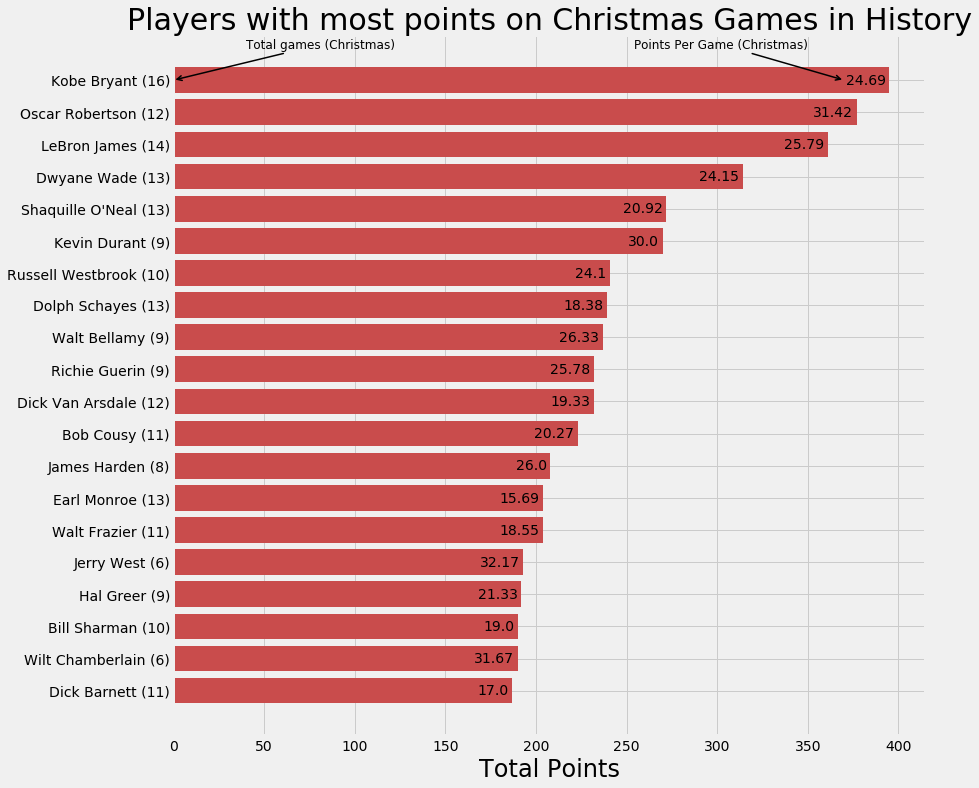

In [102]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.barh(y=merged_df.PLAYER_NAME, width=merged_df.PTS, color='#C94C4C')
ax.set_title('Players with most points on Christmas Games in History', size=30)
ax.set_xlabel("Total Points", size=24)
_ = ax.set_yticks([tick for tick in range(0, len(top_players), 1)])
#ax.set_xticklabels(f"{item}%" for item in range(0, 105, 20))
_ = ax.set_yticklabels(f"{merged_df.iloc[i].PLAYER_NAME} ({merged_df.iloc[i].TOTAL_GAMES})" for i in range(len(merged_df)))

for i in range(len(merged_df)):
    item = merged_df.iloc[i]
    ax.text(x=item.PTS - 2, y=i, s=f"{item.PPG}", va='center', ha='right')
    
ax.annotate('Points Per Game (Christmas)', xy=(370, len(merged_df)-1), xytext=(350, len(merged_df)),
            arrowprops=dict(color='black', arrowstyle='->', lw=1.5), color='black', size=12, ha='right')

ax.annotate('Total games (Christmas)', xy=(0, len(merged_df)-1), xytext=(40, len(merged_df)),
            arrowprops=dict(color='black', arrowstyle='->', lw=1.5), color='black', size=12, ha='left')

Text(40, 20, 'Ukupno utakmica (Božić)')

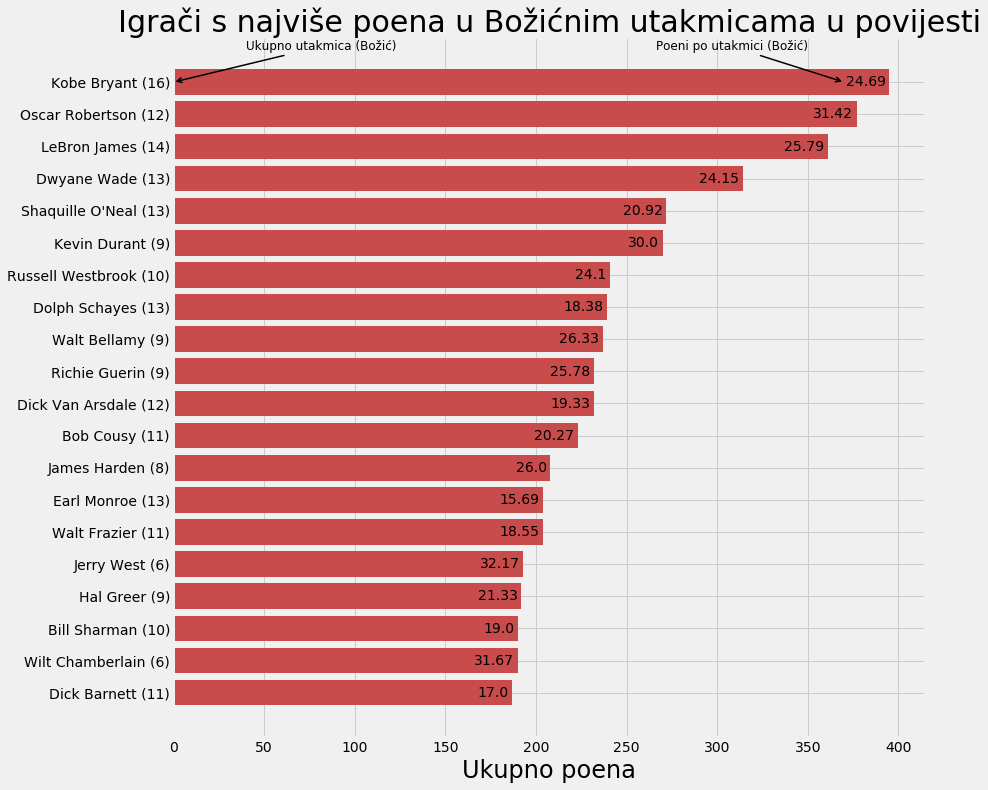

In [103]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.barh(y=merged_df.PLAYER_NAME, width=merged_df.PTS, color='#C94C4C')
ax.set_title('Igrači s najviše poena u Božićnim utakmicama u povijesti', size=30)
ax.set_xlabel("Ukupno poena", size=24)
_ = ax.set_yticks([tick for tick in range(0, len(top_players), 1)])
#ax.set_xticklabels(f"{item}%" for item in range(0, 105, 20))
_ = ax.set_yticklabels(f"{merged_df.iloc[i].PLAYER_NAME} ({merged_df.iloc[i].TOTAL_GAMES})" for i in range(len(merged_df)))

for i in range(len(merged_df)):
    item = merged_df.iloc[i]
    ax.text(x=item.PTS - 2, y=i, s=f"{item.PPG}", va='center', ha='right')
    
ax.annotate('Poeni po utakmici (Božić)', xy=(370, len(merged_df)-1), xytext=(350, len(merged_df)),
            arrowprops=dict(color='black', arrowstyle='->', lw=1.5), color='black', size=12, ha='right')

ax.annotate('Ukupno utakmica (Božić)', xy=(0, len(merged_df)-1), xytext=(40, len(merged_df)),
            arrowprops=dict(color='black', arrowstyle='->', lw=1.5), color='black', size=12, ha='left')